In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/MyDrive/Information Retrieval/Final Project Demo')

Mounted at /content/gdrive/


In [ ]:
import json

recipe_data = []

with open('/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/recipe_data.json') as f:
    for line in f:
        recipe_data.append(json.loads(line))

queries = []

with open('/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/queries.txt') as f:
    for line in f:
        queries.append(line.replace('\n',''))

In [ ]:
# pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=8ef1c15af045a327bcb40bdc678640e92161a03764c104ed03e687f69414346e
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
# Query Augmentation
from transformers import pipeline
# create pieline for MLM
mlm = pipeline('fill-mask')

def get_ingredients(query,num_ingredients):
    augmented_query = query +  " with ingredient such as <mask>."
    ingredients_dict = mlm(augmented_query)
    ingredients = []
    for i in range(num_ingredients):
        ingredients.append(ingredients_dict[i]['token_str'])
    augmented_query = query + ' with ingredient such as' + ' and'.join(ingredients)
    return augmented_query

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Data Preprocissing 
import pandas as pd
import json
from sentence_transformers import SentenceTransformer, util
from numpy import ndarray
import vector_ranker
from ranker import Ranker
import document_preprocessor
import indexing

tokenizer = document_preprocessor.RegexTokenizer(token_regex = None)
document_index = indexing.BasicInvertedIndex()
title_index = indexing.BasicInvertedIndex()
for i in range(len(recipe_data)):
    document = recipe_data[i]
    docid = document['docid']
    document_tokens = tokenizer.tokenize(document['text'])
    title_tokens = tokenizer.tokenize(document['title'])
    document_index.add_doc(docid,document_tokens)
    title_index.add_doc(docid,title_tokens)

stopwords = set()
doc_category_info = dict()
with open('/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/stopwords.txt', 'r', encoding='utf-8') as file:
    for stopword in file:
        stopwords.add(stopword)

raw_text_dict = {}
for data in recipe_data:
    raw_text_dict[data['docid']] = data['text']

doc2query = pd.read_csv('/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/doc2query.csv')
model_name = "sentence-transformers/msmarco-MiniLM-L12-cos-v5"
encode_model = SentenceTransformer(model_name)
doc_content = []
doc_augment_dict = {}
for i in range(len(recipe_data)):
    text = recipe_data[i]['text']
    title = recipe_data[i]['title']
    docid = i+1
    query_1 = list(doc2query[doc2query['doc']==docid]['query'])[0]
    query_2 = list(doc2query[doc2query['doc']==docid]['query'])[1]
    query_3 = list(doc2query[doc2query['doc']==docid]['query'])[2]
    document_index.add_doc(docid,query_1)
    document_index.add_doc(docid,query_2)
    document_index.add_doc(docid,query_3)
    doc_augment_dict[docid] = [query_1,query_2,query_3]
    content = title + ' ' + text + " " + query_1 + " " + query_2 + " " + query_3
    doc_content.append(content)
encoded_content = encode_model.encode(doc_content)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.13k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
# LDA Labeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs_tokenize)

k = 3  
lda = LatentDirichletAllocation(n_components=k, random_state=42)
lda.fit(X)

doc_topic_distribution = lda.transform(X)
most_likely_topic_3 = np.argmax(doc_topic_distribution, axis=1)

k = 5  
lda = LatentDirichletAllocation(n_components=k, random_state=42)
lda.fit(X)

doc_topic_distribution = lda.transform(X)
most_likely_topic_5 = np.argmax(doc_topic_distribution, axis=1)

k = 7  
lda = LatentDirichletAllocation(n_components=k, random_state=42)
lda.fit(X)

doc_topic_distribution = lda.transform(X)
most_likely_topic_7 = np.argmax(doc_topic_distribution, axis=1)

In [ ]:
# Model Construction
from vector_ranker import *
from ranker import *
import json
from vector_ranker import *
from l2r import *

category_data = pd.read_csv('/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/LDA_result.csv')
train_data_path = "/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/relevance_data_train.csv"

# ce = CrossEncoderScorer(raw_text_dict)
L2Rfe = L2RFeatureExtractor(document_index, title_index, tokenizer, stopwords, ce, category_data)
Ranker_BM25 = Ranker(document_index, tokenizer, stopwords, BM25(document_index), raw_text_dict)

l2r_model_BM25 = L2RRanker(document_index, title_index, 'LGBM', tokenizer, stopwords, Ranker_BM25, L2Rfe)
l2r_model_BM25.train(train_data_path)

Ranker_VR = VectorRanker(model_name, encoded_content, list(range(1,849)))

l2r_model_VR = L2RRanker(document_index, title_index, 'LGBM', tokenizer, stopwords, Ranker_VR, L2Rfe)
l2r_model_VR.train(train_data_path)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/ranker.py:222: RuntimeWarning: invalid value encountered in log
  tmp = np.log((N-df+0.5)/(df+0.5))*((self.k1+1)*cd_w)/(self.k1*((1-self.b)+self.b*dl/avdl)+cd_w)*((self.k3+1)*cq_w)/(self.k3+cq_w)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1341
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 17


/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/ranker.py:222: RuntimeWarning: invalid value encountered in log
  tmp = np.log((N-df+0.5)/(df+0.5))*((self.k1+1)*cd_w)/(self.k1*((1-self.b)+self.b*dl/avdl)+cd_w)*((self.k3+1)*cq_w)/(self.k3+cq_w)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1341
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 17


In [ ]:
# Scoring Functions 
from relevance import *
import warnings
warnings.filterwarnings('ignore')
test_data = pd.read_csv("/content/gdrive/MyDrive/Information Retrieval/Final Project Demo/relevance_data_test.csv", encoding='unicode_escape')
queries = set(test_data['query'].to_list())
data = test_data

def transfer_MAP_list(scores_list, query, data):
    MAP_list = []
    query_data = data[data['query']==query]
    docids = [i[0] for i in scores_list]
    data_docids = list(query_data['docid'])
    for docid in docids:
        if docid in data_docids:
            try:
                if int(query_data[query_data['docid']==docid]['rel']) >= 4:
                    MAP_list.append(1)
                else:
                    MAP_list.append(0)
            except:
                MAP_list.append(0)

    return MAP_list

def transfer_NDCG_list(scores_list, query, data):
    new_score_list = []
    NDCG_list = []
    query_data = data[data['query']==query]
    docids = [i[0] for i in scores_list]
    data_docids = list(query_data['docid'])
    for docid in docids:
        if (docid in data_docids):
            rel = int(query_data[query_data['docid']==docid]['rel'])
            NDCG_list.append(rel)
            new_score_list = new_score_list + [item[1] for item in scores_list if item[0] == docid]
    real_NDCG_list = NDCG_list
    ideal_NDCG_list = sorted(real_NDCG_list,reverse=True)

    return real_NDCG_list, ideal_NDCG_list

def compute_score(ranker, query, lambda_):
    augmented_query = get_ingredients(query,5)
    try:
        scores_list = ranker.query(augmented_query, lambda_)
    except:
        scores_list = ranker.query(augmented_query)
    MAP_list = transfer_MAP_list(scores_list, query, data)
    new_list, NDCG_list = transfer_NDCG_list(scores_list, query, data)
    MAP_score = map_score(MAP_list)
    NDCG_score = ndcg_score(new_list, NDCG_list)

    return MAP_score, NDCG_score

In [ ]:
# Generate result by test data
MAP_score_BM25 = []
NDCG_score_BM25 = []
MAP_score_L2R_BM25 = []
NDCG_score_L2R_BM25 = []
MAP_score_L2R_VR = []
NDCG_score_L2R_VR = []

for query in queries:
    print(query)
    BM25_map, BM25_ndcg = compute_score(Ranker_BM25,query,1)
    MAP_score_BM25.append(BM25_map), NDCG_score_BM25.append(BM25_ndcg)
    L2R_BM25_map, L2R_BM25_ndcg = compute_score(l2r_model_BM25,query,1)
    MAP_score_L2R_BM25.append(L2R_BM25_map), NDCG_score_L2R_BM25.append(L2R_BM25_ndcg)
    L2R_VR_map, L2R_VR_ndcg = compute_score(l2r_model_VR,query,1)
    MAP_score_L2R_VR.append(L2R_VR_map), NDCG_score_L2R_VR.append(L2R_VR_ndcg)

Signature rum cocktails with a tropical twist
Signature cocktail for parties
Refreshing citrus taste for lemonade
Refreshing vodka mixed drinks for summer
Sangria Recipes Bursting with Fruits and Flavors
Sour and sweet cocktail
Unique Tea Drinks for Tea Time
Vanilla hint in iced chai latte


[Text(0.5, 1.0, 'Query + Document Augmentation')]

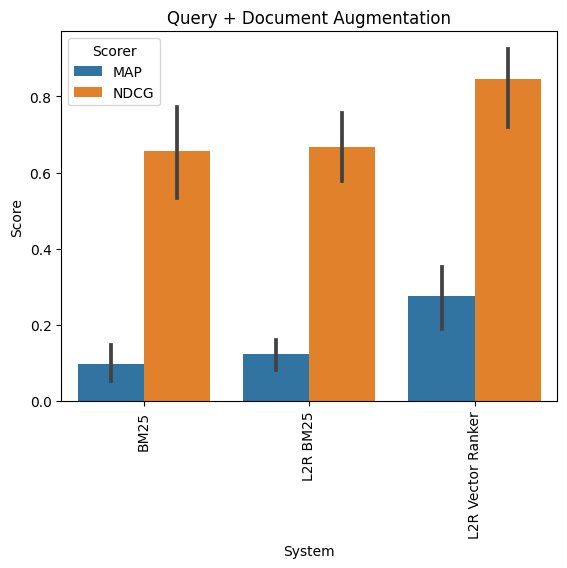

In [ ]:
dt_BM25 = pd.DataFrame({'Score':MAP_score_BM25+NDCG_score_BM25,'System':['BM25']*16,'Scorer':['MAP']*8+['NDCG']*8})
dt_l2r_BM25 = pd.DataFrame({'Score':MAP_score_L2R_BM25+NDCG_score_L2R_BM25,'System':['L2R BM25']*16,'Scorer':['MAP']*8+['NDCG']*8})
dt_l2r_VectorRanker = pd.DataFrame({'Score':MAP_score_L2R_VR+NDCG_score_L2R_VR,'System':['L2R Vector Ranker']*16,'Scorer':['MAP']*8+['NDCG']*8})
dt = pd.concat([dt_BM25,dt_l2r_BM25,dt_l2r_VectorRanker])

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = sns.barplot(x="System", y="Score", hue = "Scorer", data=dt)
ax.tick_params(axis='x', rotation=90)
ax.set(title='Query + Document Augmentation')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'doc length'),
  Text(1, 0, 'title length'),
  Text(2, 0, 'query length'),
  Text(3, 0, 'tfd'),
  Text(4, 0, 'tfidf_d'),
  Text(5, 0, 'tft'),
  Text(6, 0, 'tfidf_t'),
  Text(7, 0, 'bm25'),
  Text(8, 0, 'pivoted normal'),
  Text(9, 0, 'cross encoder'),
  Text(10, 0, 'stop word ratio'),
  Text(11, 0, 'label_1'),
  Text(12, 0, 'label_2'),
  Text(13, 0, 'label_3'),
  Text(14, 0, 'label_4'),
  Text(15, 0, 'label_5'),
  Text(16, 0, 'label_6'),
  Text(17, 0, 'label_7')])

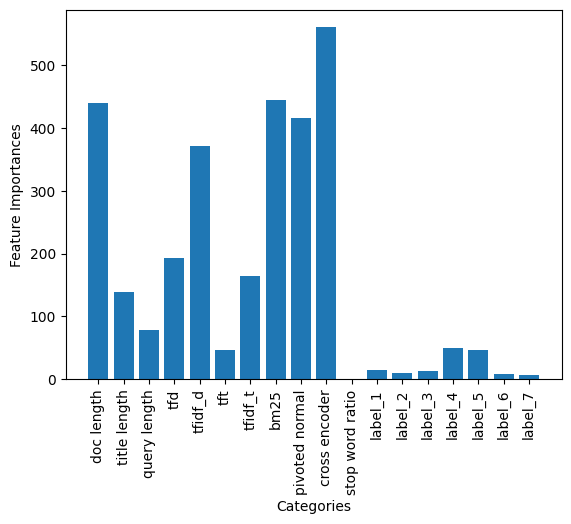

In [ ]:
# Importance comparison
import matplotlib.pyplot as plt
plt.bar(feature_names, feature_importances_)
plt.xlabel('Categories')
plt.ylabel('Feature Importances')
plt.xticks(rotation=90)